# Data-Driven Strategy for Microsoft Film Studio's Debut Release
***
<b>Authors:</b> Wes Newcomb, Jared Mitchell, Seraj Khazei

## Overview
***
Microsoft has recently decided to join Apple and Amazon as big tech firms rush to the film industry. However, the film industry is notoriously difficult to navigate, with only roughly 30% of films breaking a profit on average. While there are some more archaic methods that studios have utilized for years to boost the chances of film profitability, there is no legacy approach that guarantees the profitability of a film. But this is no longer the case. The data revolution has brought about new opportunities for industry insight. As this team of analysts will demonstrate, analyzing large datasets using machine methods enables humans to reap crisp insights into the nature of the film industry; as a result, Microsoft hired us to create a formula for maximizing profits and minimizing risks in order to secure a victory in its foray into the world of cinema.

something about business understanding, and how to calculate profit of a movie

## Data
***
In order to answer the questions ahead of us, we have implemented datasets from <a href="https://www.imdb.com/">imdb.com</a>, <a href="https://www.the-numbers.com/">thenumbers.com</a>, and <a href="https://www.themoviedb.org/">themoviedb.com</a>. We chose each for their sizes (all are sufficiently large as to provide an accurate sample of the total movies population), and because they are all independently maintained (thus ensuring the quality of the data). 

To further optimize our recommendations to Microsoft Studios, we decided to focus only on films made during during or after the year 2000 as this technique filters in favor of modern trends. 

## Methods
***

In [1]:
# import all necessary modules for analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

In [2]:
# read in all necessary data files

imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col='Unnamed: 0')

tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
# useful functions and conversion keys

def launder(money):
    money = money.replace('$', '')
    
    for i in range(len(money)//4):
        money = money.replace(',', '')
    return int(money)


def str_to_list(x):
    x = x.replace('[', '')
    x = x.replace(']', '')
    r_list = x.split(',')
    r_list = [x.strip() for x in r_list]
    
    return r_list


def imdb_format(person):
    
    if ',' in person:
        r_person = person.split(',')
    else:
        r_person = [person]
    return r_person


# a key to convert genre ids to genre names for the tmdb dataset
    
num_to_genre =    {'28':'Action',
                    '12':'Adventure',
                    '16':'Animation',
                    '35':'Comedy',
                    '80':'Crime',
                    '99':'Documentary',
                    '18':'Drama',
                    '10751':'Family',
                    '14':'Fantasy',
                    '36':'History',
                    '27':'Horror',
                    '10402':'Music',
                    '9648':'Mystery',
                    '10749':'Romance',
                    '878':'Science Fiction',
                    '10770':'TV Movie',
                    '53':'Thriller',
                    '10752':'War',
                    '37':'Western'}

### Clean And Join Datasets

In [4]:
# clean tn dataset
tn_df = tn_movie_budgets.drop(['id','domestic_gross'], axis=1)
tn_df['production_budget'] = tn_df['production_budget'].apply(launder)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].apply(launder)
tn_df['release_date'] = tn_df['release_date'].map(lambda date: date[-4:])
tn_df.dropna(inplace=True)
tn_df['profits'] = tn_df['worldwide_gross'] - 2*tn_df['production_budget']
tn_df['profitable'] = tn_df['profits'] > 0

In [5]:
# clean tmdb dataset
tmdb_df = tmdb_movies.drop(['id','original_language','original_title','popularity',
                            'release_date','vote_average','vote_count'], axis=1)
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(str_to_list)
tmdb_df.dropna(inplace=True)
tmdb_df = tmdb_df.explode('genre_ids', ignore_index=True)
tmdb_df = tmdb_df.replace('', np.nan)
tmdb_df.dropna(inplace=True)
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].map(lambda x: num_to_genre[x])

In [6]:
# clean imdb datasets
imdb_people = imdb_name[imdb_name['death_year'].isna()]
imdb_people = imdb_people.drop(['birth_year','death_year','primary_profession','known_for_titles'], axis=1)

imdb_casts = imdb_principals.drop(['ordering','category','job','characters'], axis=1)
imdb_movies = imdb_basics.drop(['original_title', 'runtime_minutes'], axis=1)

In [7]:
# join imdb datasets for one large imdb dataframe
imdb_people.set_index('nconst', inplace=True)
imdb_casts.set_index('nconst', inplace=True)
imdb_cast_per_film = imdb_casts.join(imdb_people)

imdb_cast_per_film.set_index('tconst', inplace=True)
imdb_movies.set_index('tconst', inplace=True)
imdb_df = imdb_cast_per_film.join(imdb_movies)

In [8]:
# clean final imdb dataset
imdb_df.dropna(inplace=True)
imdb_df.reset_index(inplace=True)
imdb_df.drop('tconst', axis=1, inplace=True)

In [9]:
# preview datasets
tn_df.head()

,release_date,movie,production_budget,worldwide_gross,profits,profitable
0,2009,Avatar,425000000,2776345279,1926345279,True
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,224463875,True
2,2019,Dark Phoenix,350000000,149762350,-550237650,False
3,2015,Avengers: Age of Ultron,330600000,1403013963,741813963,True
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,682721747,True


In [10]:
tmdb_df.head()

,genre_ids,title
0,Adventure,Harry Potter and the Deathly Hallows: Part 1
1,Fantasy,Harry Potter and the Deathly Hallows: Part 1
2,Family,Harry Potter and the Deathly Hallows: Part 1
3,Fantasy,How to Train Your Dragon
4,Adventure,How to Train Your Dragon


In [11]:
imdb_df.head()

,primary_name,primary_title,start_year,genres
0,Gulzar,Sunghursh,2013,"Action,Crime,Drama"
1,Dilip Kumar,Sunghursh,2013,"Action,Crime,Drama"
2,Vyjayanthimala,Sunghursh,2013,"Action,Crime,Drama"
3,Anjana Rawail,Sunghursh,2013,"Action,Crime,Drama"
4,Aruna Irani,One Day Before the Rainy Season,2019,"Biography,Drama"


### Number of Films Made Each Year By Genre

In [12]:
df_grand = tmdb_df.set_index('title').join(tn_df.set_index('movie'))

In [13]:
df_grand.dropna(inplace=True)
df_grand['release_date'] = df_grand['release_date'].apply('int64')
df_grand = df_grand[(df_grand['release_date'] > 1999) & (df_grand['release_date'] < 2019)]

In [14]:
genre_freq_by_year = df_grand.groupby(['release_date','genre_ids'])['production_budget'].count()

In [15]:
x = list(genre_freq_by_year.index)
y = list(genre_freq_by_year.values)

In [16]:
plt_dict = {k[1]:[] for k in x}

for k,v in zip(x,y):
    tup_obj = (k[0],v)
    
    plt_dict[k[1]].append(tup_obj)

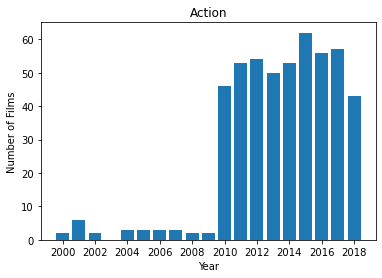

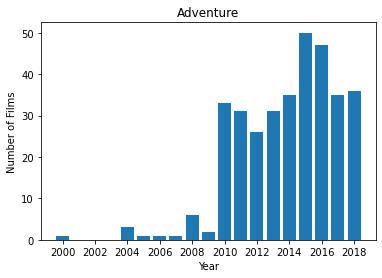

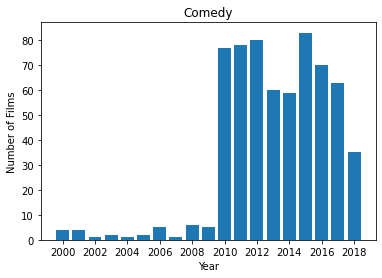

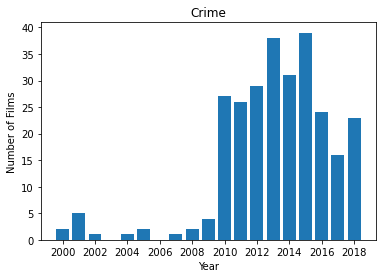

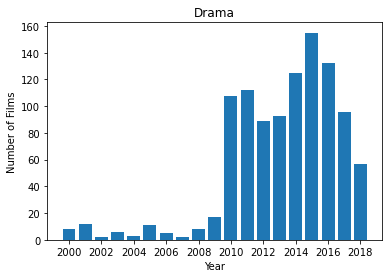

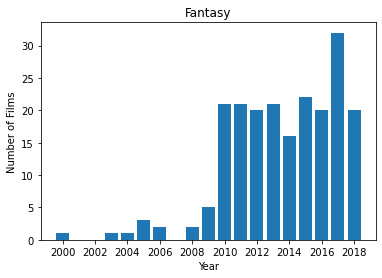

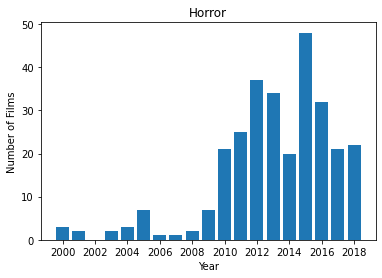

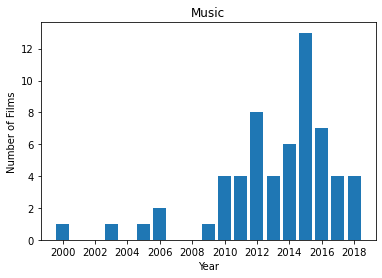

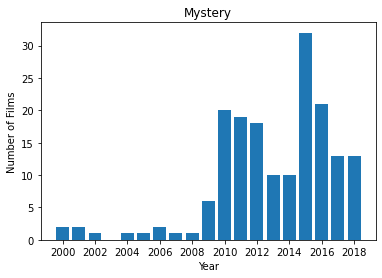

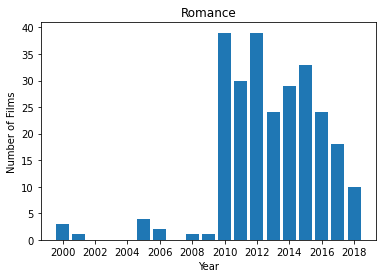

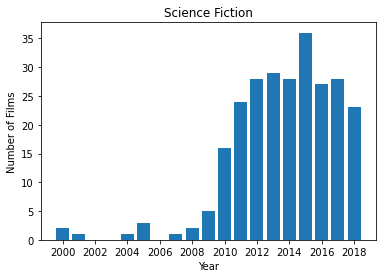

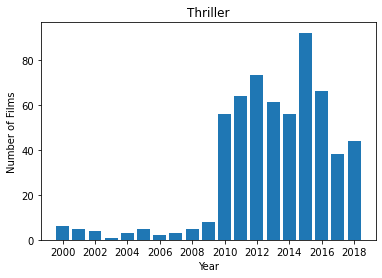

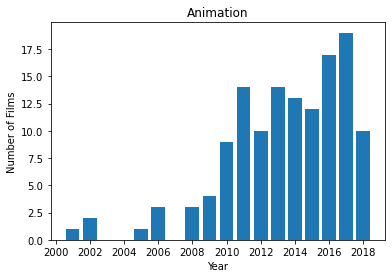

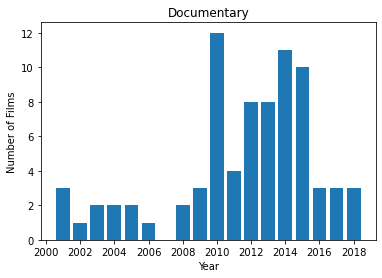

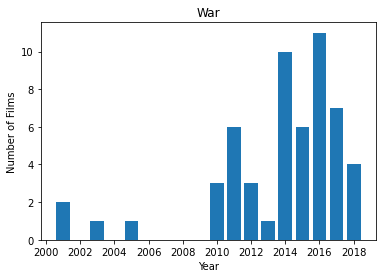

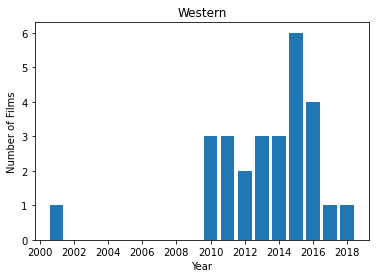

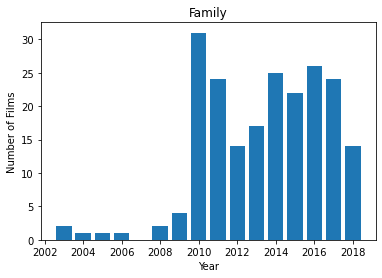

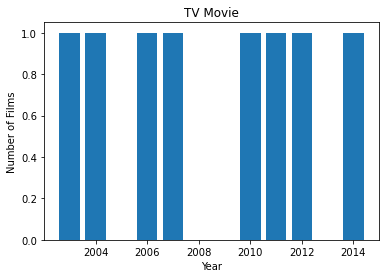

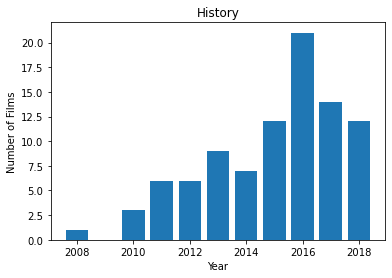

In [17]:
for genre in plt_dict:
    
    plt.figure()
    title = genre
    x_lab = 'Year'
    y_lab = 'Number of Films'
    list_obj = plt_dict[genre]
    x = [a[0] for a in list_obj]
    y = [b[1] for b in list_obj]
    xint = range(2000, 2019, 2)
    plt.xticks(xint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

### Percent Share of Market Total Films Produced Per Year By Genre

In [18]:
ww_films_per_year = df_grand.drop_duplicates().groupby('release_date')['worldwide_gross'].count()

In [19]:
years = ww_films_per_year.index
num_films = ww_films_per_year.values

ww_films_per_year_dict = {y:n for y,n in zip(years,num_films)}

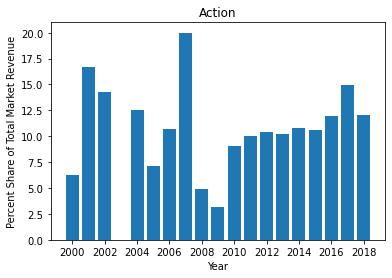

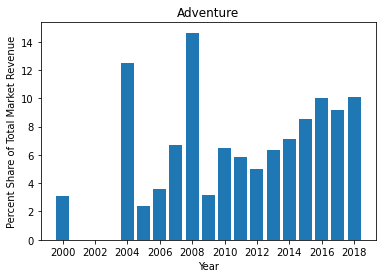

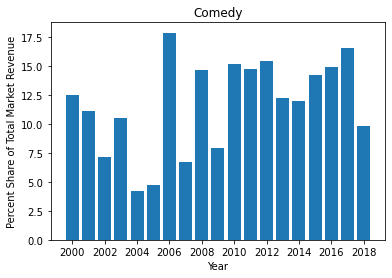

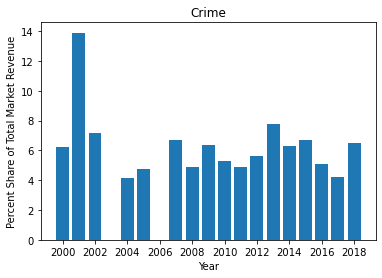

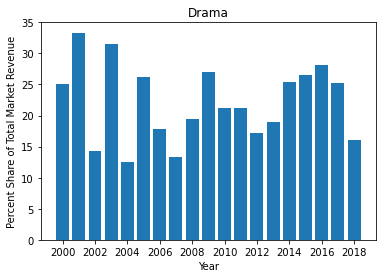

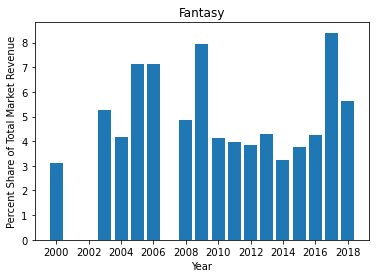

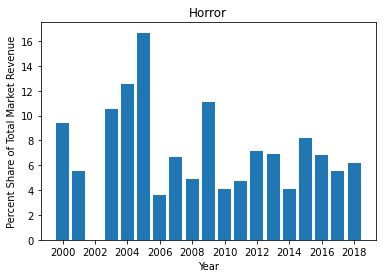

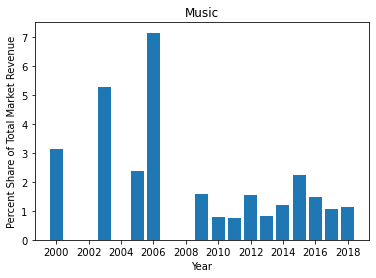

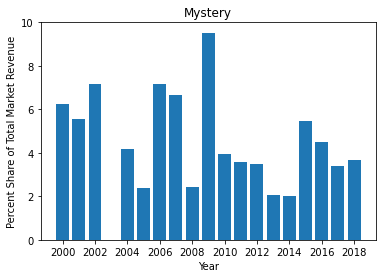

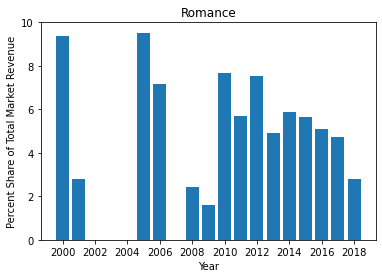

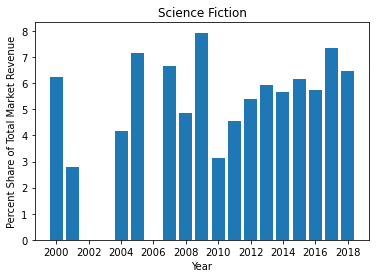

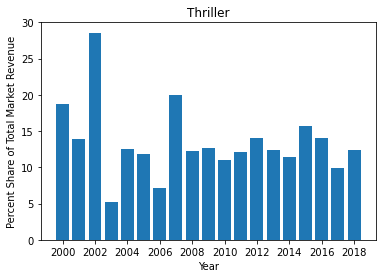

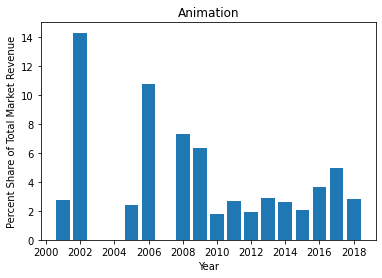

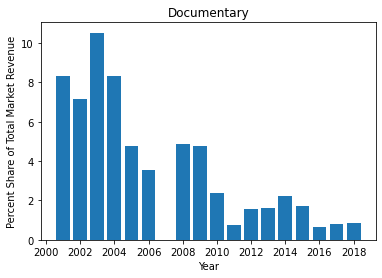

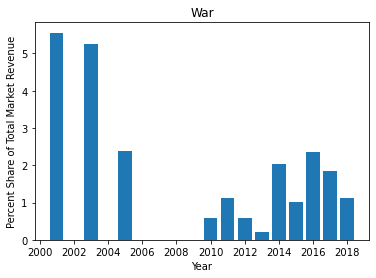

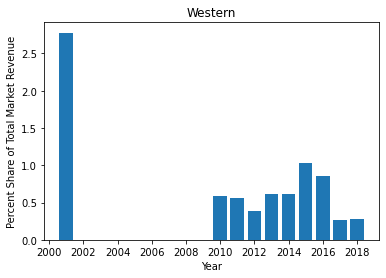

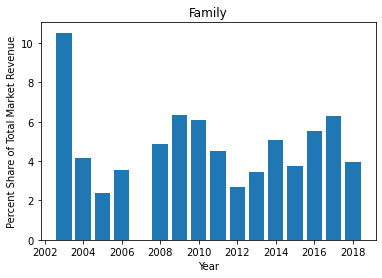

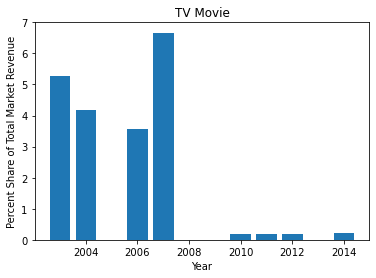

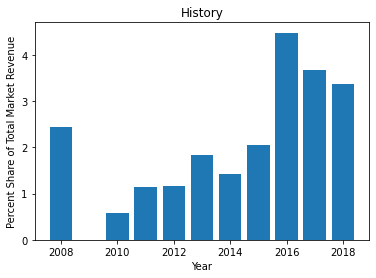

In [20]:
for genre in plt_dict:
    
    plt.figure()
    title = genre
    x_lab = 'Year'
    y_lab = 'Percent Share of Total Market Revenue'
    list_obj = plt_dict[genre]
    x = [a[0] for a in list_obj]
    y = [b[1]*100/ww_films_per_year_dict[b[0]] for b in list_obj]
    xint = range(2000, 2019, 2)
    plt.xticks(xint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

### Revenue Per Year by Genre

In [21]:
rev_per_year = df_grand.groupby(['release_date','genre_ids'])['worldwide_gross'].sum()

In [22]:
x = rev_per_year.index
y = rev_per_year.values

In [23]:
plt_dict = {k[1]:[] for k in x}

for k,v in zip(x,y):
    tup_obj = (k[0],v)
    
    plt_dict[k[1]].append(tup_obj)

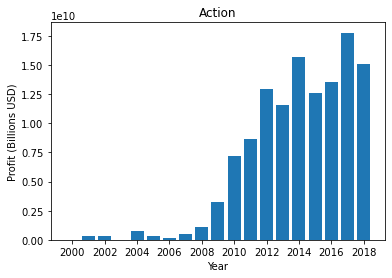

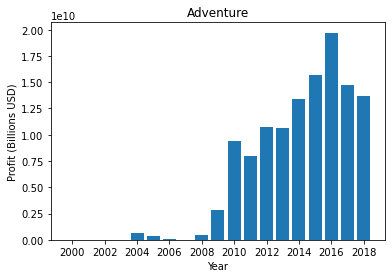

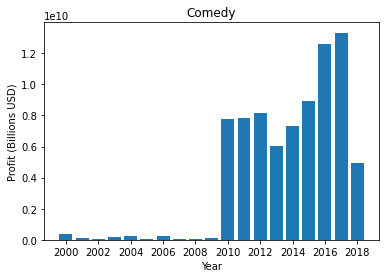

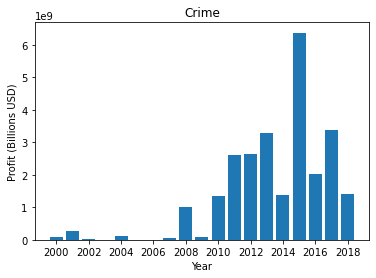

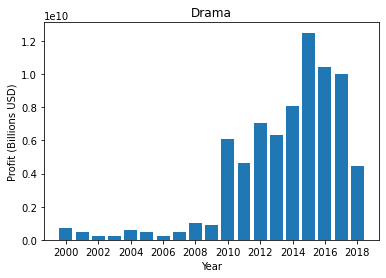

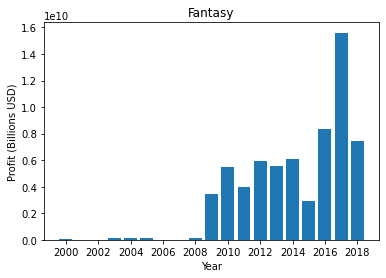

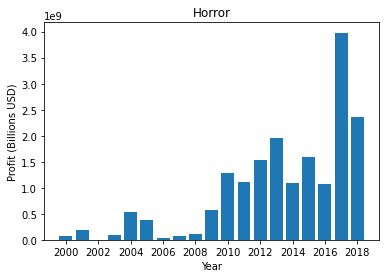

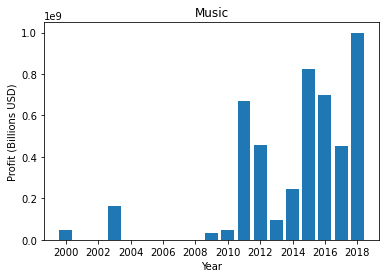

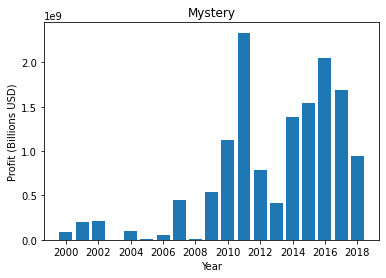

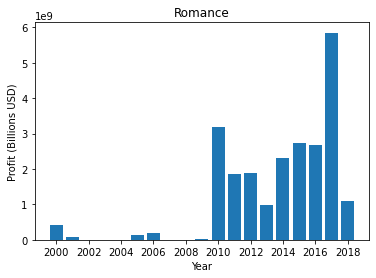

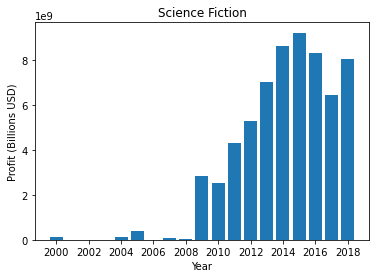

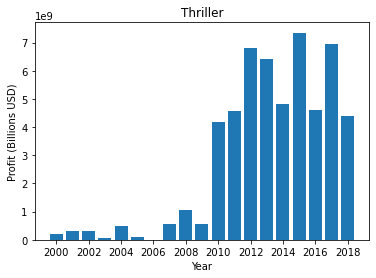

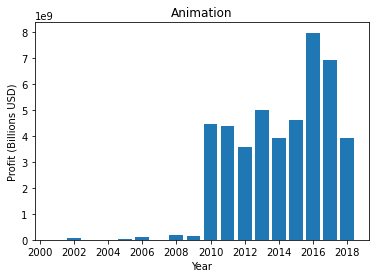

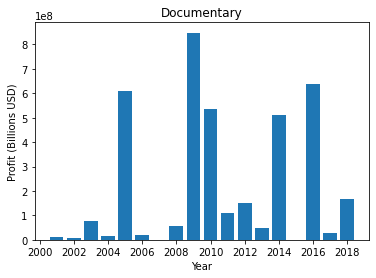

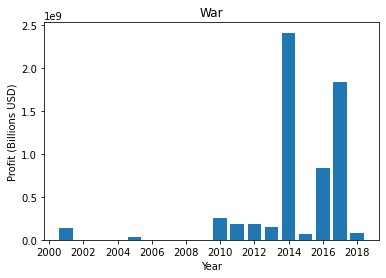

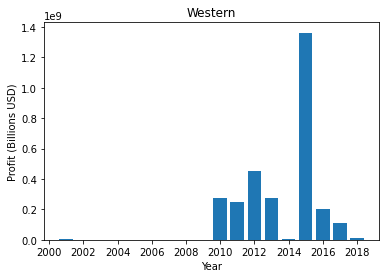

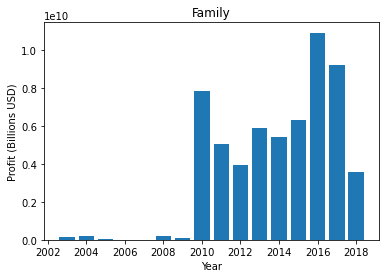

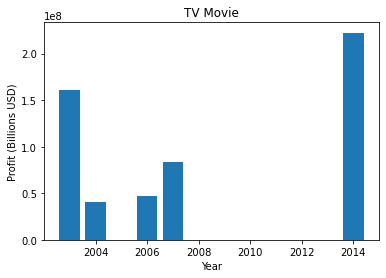

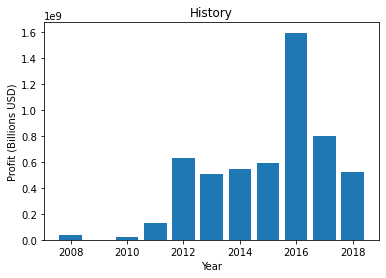

In [24]:
for genre in plt_dict:
    
    plt.figure()
    title = genre
    x_lab = 'Year'
    y_lab = 'Profit (Billions USD)'
    list_obj = plt_dict[genre]
    x = [a[0] for a in list_obj]
    y = [b[1] for b in list_obj]
    xint = range(2000, 2019, 2)
    plt.xticks(xint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

### Percent Share of Market Total Revenue Per Year By Genre

In [25]:
ww_rev_per_year = df_grand.drop_duplicates().groupby('release_date')['worldwide_gross'].sum()


In [26]:
f = list(ww_rev_per_year.index)
g = list(ww_rev_per_year.values)

w_dict = {year:rev for year,rev in zip(f,g)}

In [27]:
plt_dict

{'Action': [(2000, 17110171.0),
  (2001, 327447469.0),
  (2002, 283514387.0),
  (2004, 742504835.0),
  (2005, 340254218.0),
  (2006, 145144395.0),
  (2007, 485461572.0),
  (2008, 1059289578.0),
  (2009, 3274783491.0),
  (2010, 7229454143.0),
  (2011, 8678443255.0),
  (2012, 12986146550.0),
  (2013, 11567060634.0),
  (2014, 15732546400.0),
  (2015, 12585080964.0),
  (2016, 13542493573.0),
  (2017, 17789161227.0),
  (2018, 15121350619.0)],
 'Adventure': [(2000, 1638202.0),
  (2004, 644459735.0),
  (2005, 333132750.0),
  (2006, 94973540.0),
  (2007, 0.0),
  (2008, 437231115.0),
  (2009, 2829854137.0),
  (2010, 9413072002.0),
  (2011, 7949201798.0),
  (2012, 10758080394.0),
  (2013, 10685479939.0),
  (2014, 13450148688.0),
  (2015, 15669381777.0),
  (2016, 19713698786.0),
  (2017, 14747409400.0),
  (2018, 13650930222.0)],
 'Comedy': [(2000, 387440095.0),
  (2001, 96171969.0),
  (2002, 50970660.0),
  (2003, 161882950.0),
  (2004, 212956024.0),
  (2005, 44649906.0),
  (2006, 218924367.0),
  

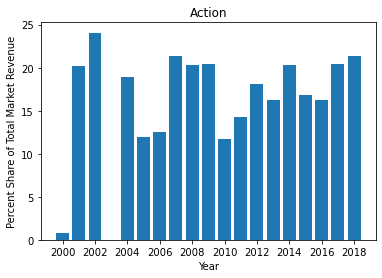

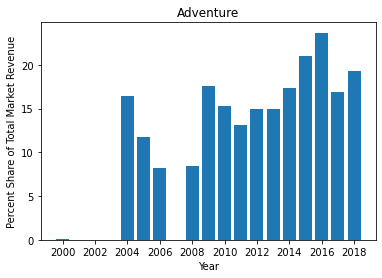

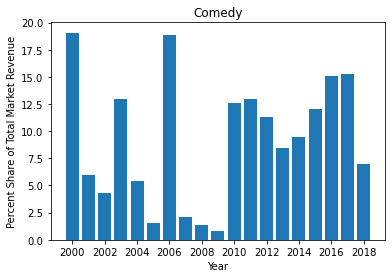

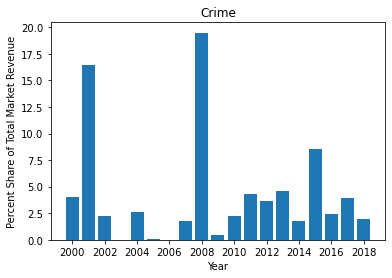

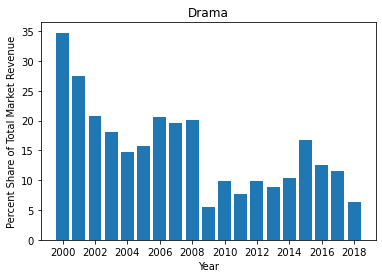

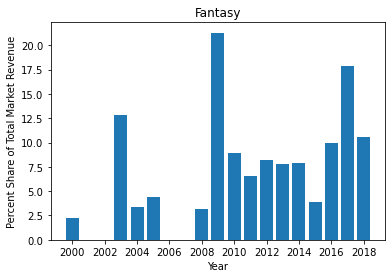

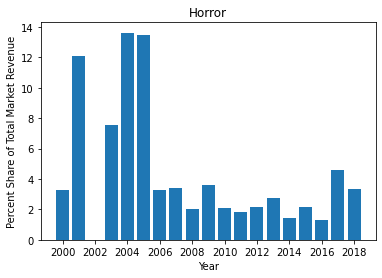

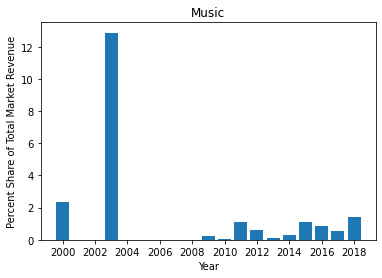

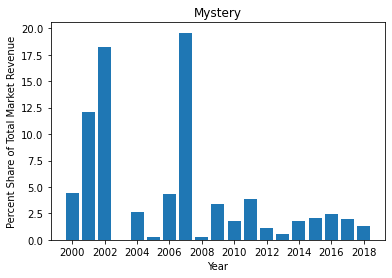

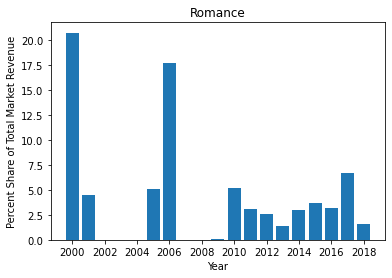

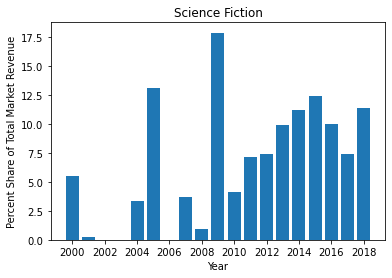

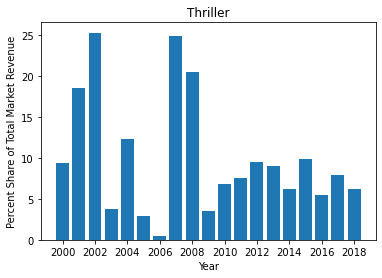

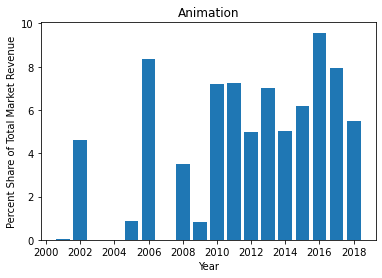

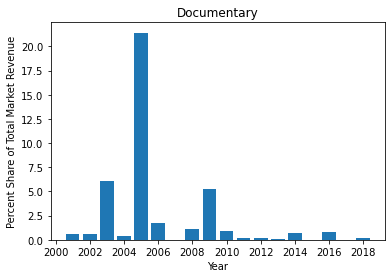

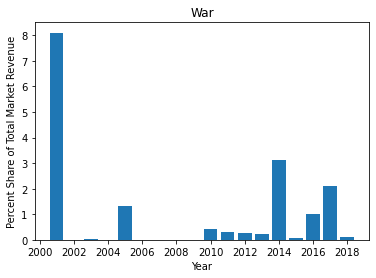

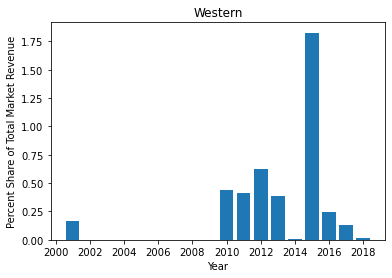

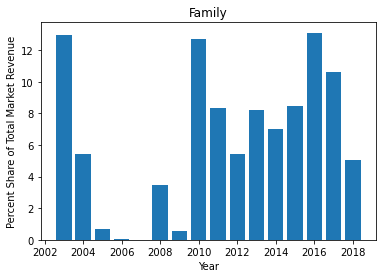

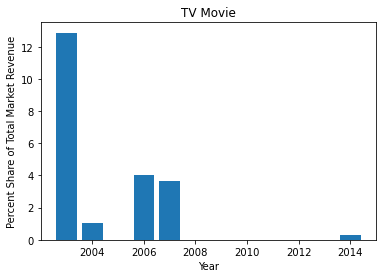

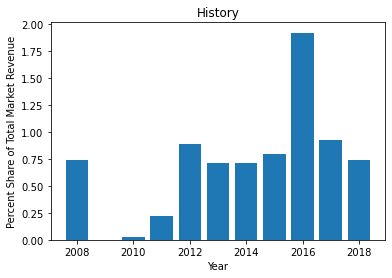

In [28]:
for genre in plt_dict:
    
    plt.figure()
    title = genre
    x_lab = 'Year'
    y_lab = 'Percent Share of Total Market Revenue'
    list_obj = plt_dict[genre]
    x = [a[0] for a in list_obj]
    y = [b[1]*100/w_dict[b[0]] for b in list_obj]
    xint = range(2000, 2019, 2)
    plt.xticks(xint)
    plt.bar(x,y)
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)

### Finding the Right Cast

In [29]:
# create df for casting
df1 = tmdb_df.set_index('title').join(tn_df.set_index('movie'))
df1.dropna(inplace=True)
action_movies = df1[df1['genre_ids'] == 'Action']
# clean
casting = imdb_df.set_index('primary_title').join(action_movies)
casting = casting.dropna().drop(['genres','start_year'], axis=1)
#preview
casting

,primary_name,genre_ids,release_date,production_budget,worldwide_gross,profits,profitable
12 Strong,Jerry Bruckheimer,Action,2018,35000000.0,71118378.0,1118378.0,True
12 Strong,Peter Craig,Action,2018,35000000.0,71118378.0,1118378.0,True
12 Strong,Thad Luckinbill,Action,2018,35000000.0,71118378.0,1118378.0,True
12 Strong,Michael Peña,Action,2018,35000000.0,71118378.0,1118378.0,True
12 Strong,Michael Shannon,Action,2018,35000000.0,71118378.0,1118378.0,True
...,...,...,...,...,...,...,...
xXx: Return of Xander Cage,Donnie Yen,Action,2017,85000000.0,345033359.0,175033359.0,True
xXx: Return of Xander Cage,Deepika Padukone,Action,2017,85000000.0,345033359.0,175033359.0,True
xXx: Return of Xander Cage,Samantha Vincent,Action,2017,85000000.0,345033359.0,175033359.0,True
xXx: Return of Xander Cage,F. Scott Frazier,Action,2017,85000000.0,345033359.0,175033359.0,True


In [30]:
# actors with number of action films they've starred in
reliable_act_series = casting['primary_name'].value_counts()

In [31]:
# make dict for storage of data
cast_index = list(reliable_act_series.index)
cast_values = list(reliable_act_series.values)

cast_dict = {i:{'num_movies':v} for i,v in zip(cast_index, cast_values)}

In [32]:
# get average profit per movie for each actor, make dict
cast_avg_prof_index = list(casting.groupby('primary_name')['profits'].mean().index)
cast_avg_prof_values = list(casting.groupby('primary_name')['profits'].mean().values)

cast_avg_prof_dict = {k:v for k,v in zip(cast_avg_prof_index, cast_avg_prof_values)}

# add these values to cast_dict
for k in cast_dict:
    cast_dict[k]['avg_profit'] = cast_avg_prof_dict[k]

In [33]:
# get profitability likelihood for actors
prob_prof = (casting.groupby('primary_name')['profitable'].sum() / 
             casting.groupby('primary_name')['profitable'].count())

cast_prob_prof_index = list(prob_prof.index)
cast_prob_prof_values = list(prob_prof.values)

cast_prof_prof_dict = {k:v for k,v in zip(cast_prob_prof_index, cast_prob_prof_values)}

# add profitability likelihoods to  cast_dict
for k in cast_dict:
    cast_dict[k]['success_rate'] = cast_prof_prof_dict[k]

In [34]:
# preview cast_dict
cast_dict

{'Dwayne Johnson': {'num_movies': 16,
  'avg_profit': 306328597.4375,
  'success_rate': 0.9375},
 'Liam Neeson': {'num_movies': 14,
  'avg_profit': 59926735.71428572,
  'success_rate': 0.7142857142857143},
 'Mark Wahlberg': {'num_movies': 12,
  'avg_profit': 45418952.166666664,
  'success_rate': 0.5},
 'Jason Statham': {'num_movies': 12,
  'avg_profit': 167781196.58333334,
  'success_rate': 0.5833333333333334},
 'Chris Hemsworth': {'num_movies': 12,
  'avg_profit': 271533527.8333333,
  'success_rate': 0.6666666666666666},
 'Nicolas Cage': {'num_movies': 11,
  'avg_profit': 4092923.090909091,
  'success_rate': 0.36363636363636365},
 'Lorenzo di Bonaventura': {'num_movies': 11,
  'avg_profit': 157086741.8181818,
  'success_rate': 0.5454545454545454},
 'Cate Blanchett': {'num_movies': 10,
  'avg_profit': 134658327.5,
  'success_rate': 0.6},
 'Luc Besson': {'num_movies': 10,
  'avg_profit': 75546643.1,
  'success_rate': 0.5},
 'Tom Cruise': {'num_movies': 10,
  'avg_profit': 61195079.0,
  

In [35]:
# make cast_stats df
df_index = cast_dict.keys()
df_values = [cast_dict[k] for k in cast_dict]

cast_stats_df = pd.DataFrame(data=df_values, index=df_index)

In [36]:
# explore stats
print(cast_stats_df.quantile(q=.6))
print()
print(cast_stats_df.quantile(q=.7))
print()
print(cast_stats_df.quantile(q=.8))
print()
print(cast_stats_df.quantile(q=.9))
print()
print(cast_stats_df.quantile(q=.95))

num_movies            1.0
avg_profit      6587268.0
success_rate          0.5
Name: 0.6, dtype: float64

num_movies      1.000000e+00
avg_profit      3.399705e+07
success_rate    1.000000e+00
Name: 0.7, dtype: float64

num_movies             2.0
avg_profit      88110562.5
success_rate           1.0
Name: 0.8, dtype: float64

num_movies              3.0
avg_profit      212157409.5
success_rate            1.0
Name: 0.9, dtype: float64

num_movies      4.000000e+00
avg_profit      3.693136e+08
success_rate    1.000000e+00
Name: 0.95, dtype: float64


In [37]:
# get cast that scores in selected percentile in in each category of measurement
power_staff = cast_stats_df[(cast_stats_df['num_movies'] > 6) &
                            (cast_stats_df['avg_profit'] > 25000000) &
                            (cast_stats_df['success_rate'] > .7)]

# drop directors from df
directors = ['Simon Kinberg','Beau Flynn',
             'Michael Bay','Christopher McQuarrie',
             'Kevin Feige','Richard Wenk',
             'Neal H. Moritz','Zack Snyder']

power_staff = power_staff.drop(directors)

In [38]:
# clean up for readability
power_staff['success_rate'] = round(power_staff['success_rate'] * 100, 1)
power_staff['avg_profit'] = round(power_staff['avg_profit']/1000000, 2)

power_staff.rename(columns={'num_movies':'Number of Movies',
                            'avg_profit':'Average Profit (Millions USD)',
                            'success_rate':'Box Office Success Rate'}, inplace=True)

In [39]:
# get all movies with a power_staff star
exp_df = casting[casting['primary_name'].isin(power_staff.index)]

In [40]:
# clean up for readability and interpretability
exp_df['production_budget'] = exp_df['production_budget'].map(lambda x: x/100000000)
exp_df['profits'] = exp_df['profits'].map(lambda x: x/100000000)

<ipython-input-40-70ca42ee55b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['production_budget'] = exp_df['production_budget'].map(lambda x: x/100000000)
<ipython-input-40-70ca42ee55b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['profits'] = exp_df['profits'].map(lambda x: x/100000000)


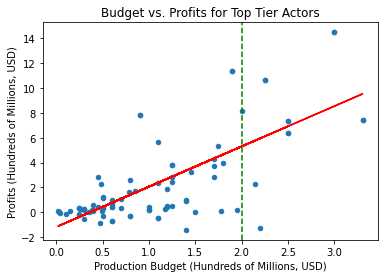

In [41]:
x=exp_df['production_budget']
y=exp_df['profits']

ax = exp_df.plot(x='production_budget', y='profits', kind='scatter', 
                 title='Budget vs. Profits for Top Tier Actors');

ax.set_xlabel('Production Budget (Hundreds of Millions, USD)');
ax.set_ylabel('Profits (Hundreds of Millions, USD)');

m, b = np.polyfit(x, y, 1);
plt.plot(x, m*x + b, color='red');
plt.axvline(x=2., color='green', linestyle='--');

In [42]:
exp_df.corr()

,production_budget,worldwide_gross,profits
production_budget,1.000000,0.862271,0.724862
worldwide_gross,0.862271,1.000000,0.973916
profits,0.724862,0.973916,1.000000


In [43]:
# find unprofitable film with production budget over $200M; it's Battleship
exp_df[exp_df['profits'] < 0]

,primary_name,genre_ids,release_date,production_budget,worldwide_gross,profits,profitable
Battleship,Liam Neeson,Action,2012,2.200,313477717.0,-1.265223,False
Faster,Dwayne Johnson,Action,2010,0.240,35792945.0,-0.122071,False
Free Fire,Sharlto Copley,Action,2017,0.100,3793739.0,-0.162063,False
Gods of Egypt,Gerard Butler,Action,2016,1.400,138836756.0,-1.411632,False
Jonah Hex,Josh Brolin,Action,2010,0.470,11022696.0,-0.829773,False
Machine Gun Preacher,Gerard Butler,Action,2011,0.300,3721988.0,-0.562780,False
Run All Night,Liam Neeson,Action,2015,0.500,66961644.0,-0.330384,False
The A-Team,Liam Neeson,Action,2010,1.100,177241171.0,-0.427588,False
The A-Team,Sharlto Copley,Action,2010,1.100,177241171.0,-0.427588,False
The Avengers,Robert Downey Jr.,Action,1998,0.600,48585416.0,-0.714146,False


In [44]:
# find out how profitability falls in gaussian
tn_df.quantile(.95)

production_budget    1.200000e+08
worldwide_gross      3.874767e+08
profits              2.362417e+08
profitable           1.000000e+00
Name: 0.95, dtype: float64

## Results

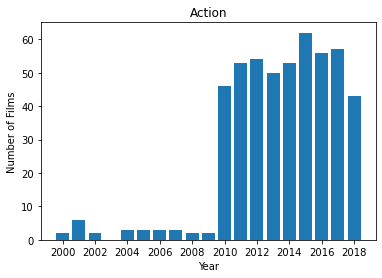

In [45]:
Image('images/action_num_films.png')

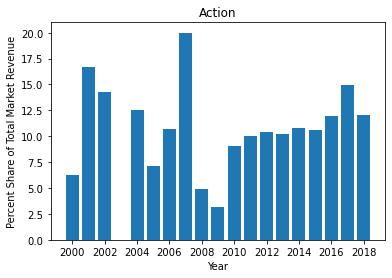

In [46]:
Image('images/action_percent_films.png')

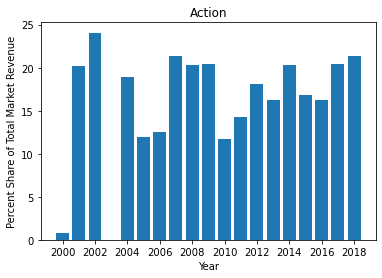

In [47]:
Image('images/action_percent_revenue.png')

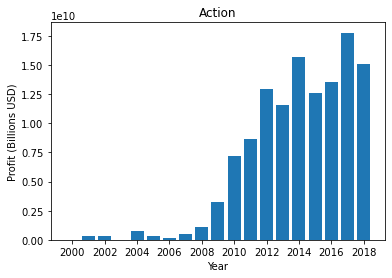

In [48]:
Image('images/action_revenue.png')